In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from spectral_cube import SpectralCube

from astropy.wcs import WCS


In [3]:
gal_1 = fits.open("gal1_cont_band4_natw.fits")
gal_2=fits.open("gal2_cont_band4_natw.fits")
gal_3=fits.open("gal3_cont_band4_natw.fits")
gal_4=fits.open("gal4_cont_band4_natw.fits")
gal_5=fits.open("gal5_cont_band4_natw.fits")


gal1 = SpectralCube.read(gal_1)  # opening cube 
gal2 = SpectralCube.read(gal_2)
gal3 = SpectralCube.read(gal_3)
gal4 = SpectralCube.read(gal_4)
gal5 = SpectralCube.read(gal_5)

<IPython.core.display.Javascript object>


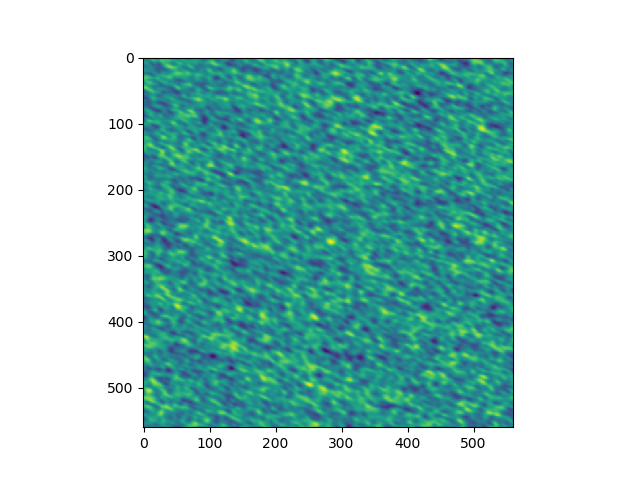

In [4]:
%matplotlib notebook

gal=gal1

plt.imshow(gal[0].value)


# Selecting region

<IPython.core.display.Javascript object>


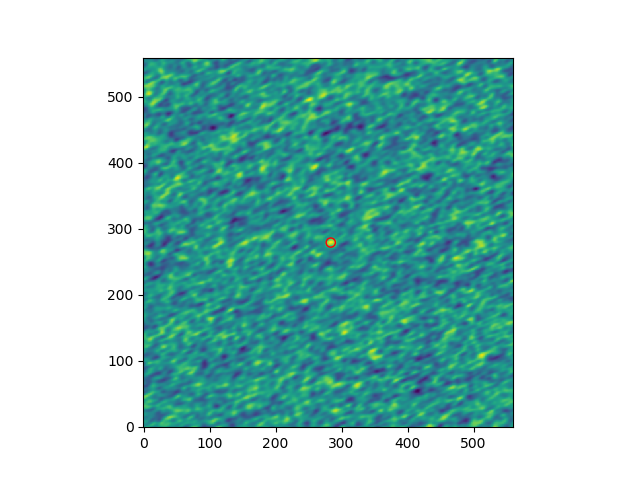

C:\Users\Jude\anaconda3\lib\site-packages\regions\shapes\circle.py:161: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Circle(xy=xy, radius=radius, **mpl_kwargs)


In [6]:
from regions import PixCoord, CirclePixelRegion
#283.68 279.26 gal_1 r=7,9
#284.17 279.87 gal_2 r=9,13
#278.63 280.96 gal_3 r=7,8
#282.89 282.04 gal_4 r=5
#277.67 280.46 gal_5 r=5

gal=gal1

fig, ax = plt.subplots()

region1 = CirclePixelRegion(center=PixCoord(x=283.68, y=279.26), radius=7)
region2 = CirclePixelRegion(center=PixCoord(x=284.17, y=279.87), radius=15)
region3 = CirclePixelRegion(center=PixCoord(x=278.38, y=281.27), radius=15)
region4 = CirclePixelRegion(center=PixCoord(x=282.89, y=282.04), radius=8)
region5 = CirclePixelRegion(center=PixCoord(x=277.67, y=280.46), radius=8)

ax.imshow(gal[0].value, interpolation='nearest', origin='lower')
region1.plot(ax=ax, color='red', lw=1.0)

<IPython.core.display.Javascript object>


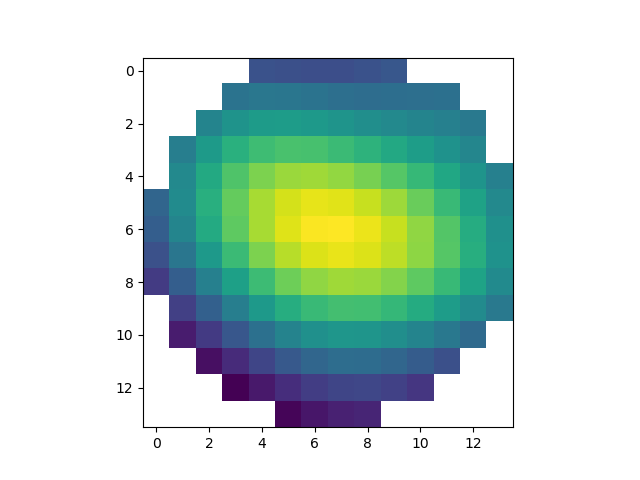

In [7]:
import regions 

%matplotlib notebook

w1=gal1.subcube_from_regions([region1])
w2=gal2.subcube_from_regions([region2])
w3=gal3.subcube_from_regions([region3])
w4=gal4.subcube_from_regions([region4])
w5=gal5.subcube_from_regions([region5])

plt.imshow(w1[0].value)

# Calculating beam area

In [8]:
area=[]
for i in (gal1,gal2,gal3,gal4,gal5):
    pixscale=abs(i.header["CDELT1"]*3600)
    bmaj=i.header["BMAJ"]*3600
    bmin=i.header["BMIN"]*3600
    beamarea=(bmaj*bmin*np.pi)/(4*np.log(2))/(pixscale**2)
    print("beam area",beamarea)
    area.append(beamarea)

beam area 138.92933045193936
beam area 140.23148780468875
beam area 107.26975192608076
beam area 34.662627630222744
beam area 34.78277808102498


# fluxs without two sigma level

In [9]:
print(w1.sum()/area[0]*1e6)
print(w2.sum()/area[1]*1e6)
print(w3.sum()/area[2]*1e6)
print(w4.sum()/area[3]*1e6)
print(w5.sum()/area[4]*1e6)

84.4251568999981 Jy / beam
220.05930057380186 Jy / beam
213.9748907323146 Jy / beam
164.05047367770717 Jy / beam
200.42032773067854 Jy / beam


# Standard Deviation

In [10]:
g1=gal1.std()
g2=gal2.std()
g3=gal3.std()
g4=gal4.std()
g5=gal5.std()
print(g1)

3.196657416992821e-05 Jy / beam


# Flux correction with above two sigma level

In [13]:
#above 2 sigma
%matplotlib notebook
#fig, ax = plt.subplots(1,1)

wng1 = w1.with_mask(w1 > 2*g1)
wng2 = w2.with_mask(w2 > 2*g2)
wng3 = w3.with_mask(w3 > 2*g3)
wng4 = w4.with_mask(w4 > 2*g4)
wng5 = w5.with_mask(w5 > 2*g5)


#ax.imshow(wng1[0].value)


In [14]:
f1=wng1.sum()/area[0]*1e6
f2=wng2.sum()/area[1]*1e6
f3=wng3.sum()/area[2]*1e6
f4=wng4.sum()/area[3]*1e6
f5=wng5.sum()/area[4]*1e6

print(f1)
print(f2)
print(f3)
print(f4)
print(f5)

67.71904113779206 Jy / beam
206.024870554965 Jy / beam
196.4530322025981 Jy / beam
104.80292529972373 Jy / beam
154.53330073944107 Jy / beam


In [15]:
# Fluxs from Professors research paper

fl1=132
fl2=212
fl3=237
fl4=111
fl5=156


# Calculate distance

In [45]:
from astropy.cosmology import WMAP9 as cosmo
redshifts=[3.1181,3.0557,2.9348,3.4315,3.3411]
dist=[]
for i in redshifts :
    d=cosmo.luminosity_distance(i)
    dist.append(d)
  
    print('redshift',i,'for {0:.2f}'.format(d))

redshift 3.1181 for 27255.31 Mpc
redshift 3.0557 for 26599.36 Mpc
redshift 2.9348 for 25334.46 Mpc
redshift 3.4315 for 30579.56 Mpc
redshift 3.3411 for 29615.78 Mpc


In [14]:
cosmo.luminosity_distance(2.31)

<Quantity 18940.76286239 Mpc>

# Rayleigh–Jeans correction


<IPython.core.display.Javascript object>


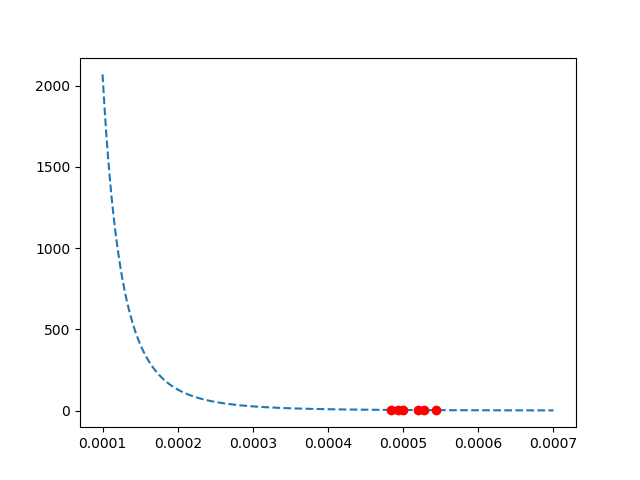

Rayleigh–Jeans correction for micrometer 519: 0.85
Rayleigh–Jeans correction for micrometer 527: 0.80
Rayleigh–Jeans correction for micrometer 544: 0.71
Rayleigh–Jeans correction for micrometer 483: 1.15
Rayleigh–Jeans correction for micrometer 493: 1.06


In [16]:

%matplotlib notebook

from scipy.constants import h, c, k, pi 
L0 = np.linspace(100,700,1000) #Wavelength in nano m
L = L0*1e-6 #wavelength in m
T=25.  # temperature

R_Lt = (2*c*k*T)/L**4 #Rayleigh's law at Low temperature
#R_Lt1 = 1/L**4 

from scipy import interpolate


f=interpolate.interp1d(L, R_Lt)
lnew=[519.990e-6,527.991e-6, 544.214e-6,483.216e-6,493.279e-6,500e-6]   #433.6 micrometer~ 520.2 micrometer
f(lnew)
plt.plot(L, R_Lt , "--", lnew,f(lnew),'ro')

plt.show()

ma1=f(lnew[0])/f(lnew[5])
ma2=f(lnew[1])/f(lnew[5])
ma3=f(lnew[2])/f(lnew[5])
ma4=f(lnew[3])/f(lnew[5])
ma5=f(lnew[4])/f(lnew[5])


print( 'Rayleigh–Jeans correction for micrometer 519: {0:.2f}'.format(ma1))
print( 'Rayleigh–Jeans correction for micrometer 527: {0:.2f}'.format(ma2))
print( 'Rayleigh–Jeans correction for micrometer 544: {0:.2f}'.format(ma3))
print( 'Rayleigh–Jeans correction for micrometer 483: {0:.2f}'.format(ma4))
print( 'Rayleigh–Jeans correction for micrometer 493: {0:.2f}'.format(ma5))

# Flux correction with Rayleigh–Jeans 


In [126]:
# corrected fluxs
fl1=132/ma1
fl2=212/ma2
fl3=237/ma3
fl4=111/ma4
fl5=156/ma4

print( 'Rayleigh–Jeans flux correction for galaxy A: {0:.2f}'.format(fl1))
print( 'Rayleigh–Jeans flux correction for galaxy B: {0:.2f}'.format(fl2))
print( 'Rayleigh–Jeans flux correction for galaxy C:: {0:.2f}'.format(fl3))
print( 'Rayleigh–Jeans flux correction for galaxy D: {0:.2f}'.format(fl4))
print( 'Rayleigh–Jeans flux correction for galaxy E: {0:.2f}'.format(fl5))

Rayleigh–Jeans flux correction for galaxy A: 154.41
Rayleigh–Jeans flux correction for galaxy B: 263.61
Rayleigh–Jeans flux correction for galaxy C:: 332.62
Rayleigh–Jeans flux correction for galaxy D: 96.83
Rayleigh–Jeans flux correction for galaxy E: 136.08


In [127]:
fluxs=[fl1,fl2,fl3,fl4,fl5] # in microJy
const=4*np.pi*1e-32
d_conv=3.085e+22
dist1=[dist[0],dist[1],dist[2],dist[3],dist[4]]
mu=140*1e9



# Continuum Luminosity

In [128]:
lum=[]
for i,j in zip(fluxs,dist1):
    
    lum.append(mu*const*i*j**2*d_conv**2)
    
lum

[<Quantity 1.92053919e+36 Mpc2>,
 <Quantity 3.12285062e+36 Mpc2>,
 <Quantity 3.57451847e+36 Mpc2>,
 <Quantity 1.51606755e+36 Mpc2>,
 <Quantity 1.99849902e+36 Mpc2>]

In [129]:
# solar luminosity 
slum=[]
L=3.82e26
for i in lum:
    slum.append(i/L)

slum


[<Quantity 5.02758951e+09 Mpc2>,
 <Quantity 8.17500163e+09 Mpc2>,
 <Quantity 9.3573782e+09 Mpc2>,
 <Quantity 3.96876321e+09 Mpc2>,
 <Quantity 5.23167282e+09 Mpc2>]

In [130]:
slu=[4.29794682e+09,6.57450606e+09,6.66740156e+09,4.54956974e+09,5.99729919e+09]
lgslum1=np.log10(slu[0])
lgslum2=np.log10(slu[1])
lgslum3=np.log10(slu[2])
lgslum4=np.log10(slu[3])
lgslum5=np.log10(slu[4])
lgslum=[lgslum1,lgslum2,lgslum3,lgslum4,lgslum5]


In [131]:
from scipy.constants import h, c, k, pi
redshifts=[3.1181,3.0557,2.9348,3.4315,3.3411]
obsalmafreq=140  #GHz
obsalmawave=c/(obsalmafreq*1e9)*1e6
restalmawave=[(obsalmawave/(1+redshifts[0])),(obsalmawave/(1+redshifts[1])),(obsalmawave/(1+redshifts[2])),(obsalmawave/(1+redshifts[3])),(obsalmawave/(1+redshifts[4]))]

diffwave=[]
for k in restalmawave:
    diffwave.append(k-500)
    
diffwave
restalmawave

[519.9909424249047,
 527.9913948270336,
 544.2143692182575,
 483.2166760690511,
 493.2792840524291]

In [132]:
# mass
mass=[]
for i,j in zip(diffwave,lgslum):
    
    mass.append((1.72-8e-4*i)+(0.96+6e-4*i)*j)
    
mass


[11.067484622129681,
 11.287644898893129,
 11.376242879361056,
 10.907822466056118,
 11.072785141628199]

In [133]:
print('mass of galaxy A ',(10**mass[0])/1e10*u.solMass)
print('mass of galaxy B ',(10**mass[1])/1e10*u.solMass)
print('mass of galaxy C ',(10**mass[2])/1e10*u.solMass)
print('mass of galaxy D ',(10**mass[3])/1e10*u.solMass)
print('mass of galaxy E ',(10**mass[4])/1e10*u.solMass)

mass of galaxy A  11.681123676076352 solMass
mass of galaxy B  19.392995598701756 solMass
mass of galaxy C  23.781699072575694 solMass
mass of galaxy D  8.087652188762936 solMass
mass of galaxy E  11.824564147053751 solMass


<IPython.core.display.Javascript object>


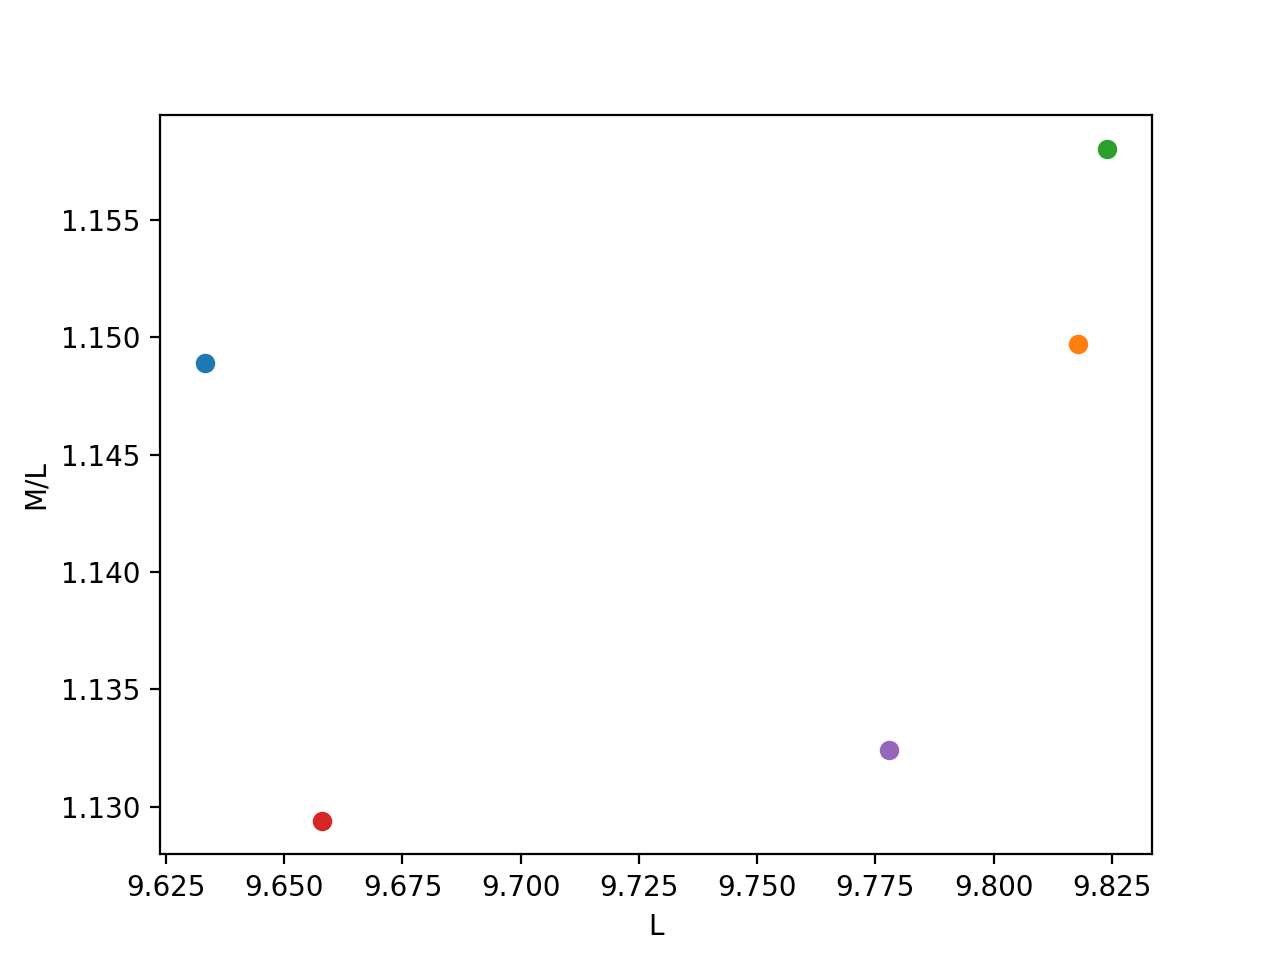

In [134]:
%matplotlib notebook

for k,j in zip(mass,lgslum):
    y=k/j
    plt.scatter(j,y)
    plt.ylabel('M/L')
    plt.xlabel('L')
    plt.show()